<a href="https://colab.research.google.com/github/AdoHaha/misp/blob/master/critical_path_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install criticalpath


  Created wheel for criticalpath: filename=criticalpath-0.1.5-cp36-none-any.whl size=12041 sha256=31b9639ca8156348bc100bb434c867d94c535ae07cf4255efc63ae789291c3f5
  Stored in directory: /root/.cache/pip/wheels/49/07/a6/e04086e98dc47934106a674b7fe4708ef4f49168f39266a182
Successfully built criticalpath


In [7]:
from criticalpath import Node

p = Node('reliable_project')
czasy_nodes = {"start":(0,),"a":(2,"start"), "b":(4,"a"),"c":(10,"b"),"d":(6,"c"),"e":(4,"c"),
               "i":(7,"c"),"g":(7,"d"),"f":(5,"e"),"h":(9,"g","e"),"j":(8,"f","i"),
               "m":(2,"h"),"k":(4,"j"),"l":(5,"j"),"n":(6,"k","l"),"finish":(0,"m","n")

               }



graph_nodes = {}

for key,val in czasy_nodes.items():
  graph_nodes[key] = p.add(Node(key,duration = val[0]))

for key,val in czasy_nodes.items():
  for parent in val[1:]:
    p.link(graph_nodes[parent], graph_nodes[key])


p.update_all()
p.get_critical_path()

p.duration

44

In [5]:
!apt install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


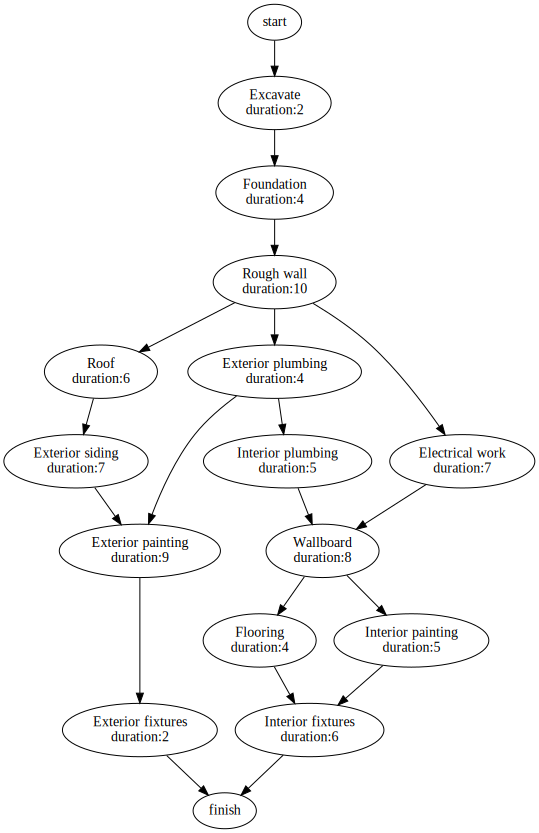

In [12]:
from graphviz import Digraph

project_tree = Digraph()


labels = dict(zip("abcdefghijklmn",["Excavate",
"Foundation",
"Rough wall",
"Roof",
"Exterior plumbing",
"Interior plumbing",
"Exterior siding",
"Exterior painting",
"Electrical work",
"Wallboard",
"Flooring",
"Interior painting",
"Exterior fixtures",
"Interior fixtures"]))


for key,val in czasy_nodes.items():
  if key not in ["start","finish"]:
    project_tree.node(key,labels[key] + "\n duration:" + str(val[0]))
  else:
    project_tree.node(key,key)
for key,val in czasy_nodes.items():
  for parent in val[1:]:
    project_tree.edge(parent,key)

project_tree